<a href="https://colab.research.google.com/github/praveenwork/ml/blob/main/Practice/RPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-02-12 00:51:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   211MB/s    in 0.9s    

2021-02-12 00:51:26 (211 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-02-12 00:51:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 142.250.31.128, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘

In [2]:
# unzip

import os
import zipfile

rps_zip_ref = zipfile.ZipFile("/tmp/rps.zip")
rps_zip_ref.extractall("/tmp")
rps_zip_ref.close()


rps_test_zip_ref = zipfile.ZipFile("/tmp/rps-test-set.zip")
rps_test_zip_ref.extractall("/tmp")
rps_test_zip_ref.close()

In [3]:
train_dir = "/tmp/rps"
validation_dir = "/tmp/rps-test-set"

train_paper_dir = os.path.join(train_dir, "paper")
train_rock_dir = os.path.join(train_dir, "rock")
train_scissors_dir = os.path.join(train_dir, "scissors")

train_paper_dir_filenames = len(os.listdir(train_paper_dir))
train_rock_dir_filenames = len(os.listdir(train_rock_dir))
train_scissors_dir_filenames = len(os.listdir(train_scissors_dir))

validation_paper_dir = os.path.join(validation_dir, "paper")
validation_rock_dir = os.path.join(validation_dir, "rock")
validation_scissors_dir = os.path.join(validation_dir, "scissors")

validation_paper_dir_filenames = len(os.listdir(validation_paper_dir))
validation_rock_dir_filenames = len(os.listdir(validation_rock_dir))
validation_scissors_dir_filenames = len(os.listdir(validation_scissors_dir))

print(train_paper_dir_filenames)
print(train_rock_dir_filenames)
print(train_scissors_dir_filenames)

print(validation_paper_dir_filenames)
print(validation_rock_dir_filenames)
print(validation_scissors_dir_filenames)





840
840
840
124
124
124


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)


validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 10, 
    class_mode = 'categorical'
)



model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu, input_shape = (150,150,3)),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1024, activation = tf.nn.relu),
            tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])

model.compile(optimizer = 'rmsprop', loss = "categorical_crossentropy", metrics = ['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = 84,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 13,
    verbose = 1
)

model.summary()

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/10
84/84 [==============================] - 15s 91ms/step - loss: 1.7068 - accuracy: 0.3676 - val_loss: 1.0355 - val_accuracy: 0.2846
Epoch 2/10
84/84 [==============================] - 7s 87ms/step - loss: 1.0677 - accuracy: 0.4498 - val_loss: 0.7505 - val_accuracy: 0.7231
Epoch 3/10
84/84 [==============================] - 7s 86ms/step - loss: 0.8883 - accuracy: 0.6200 - val_loss: 0.4417 - val_accuracy: 0.9077
Epoch 4/10
84/84 [==============================] - 7s 86ms/step - loss: 0.7461 - accuracy: 0.6621 - val_loss: 0.4383 - val_accuracy: 0.8077
Epoch 5/10
84/84 [==============================] - 7s 88ms/step - loss: 0.6577 - accuracy: 0.7092 - val_loss: 0.3258 - val_accuracy: 0.8615
Epoch 6/10
84/84 [==============================] - 7s 86ms/step - loss: 0.6124 - accuracy: 0.7268 - val_loss: 0.2422 - val_accuracy: 0.8769
Epoch 7/10
84/84 [==============================] - 7s 87ms/step - los

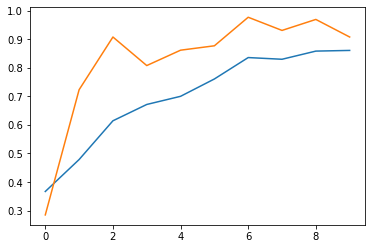

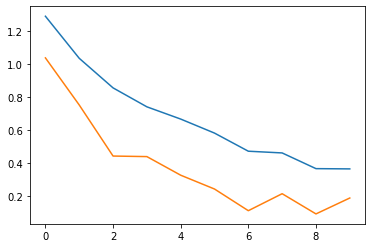

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

epoch = range(len(training_accuracy))
plt.plot(epoch, training_accuracy)
plt.plot(epoch, validation_accuracy)
plt.figure()

plt.plot(epoch, training_loss)
plt.plot(epoch, validation_loss)
plt.figure()

plt.show()
